In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
CODE_PATH = os.getcwd()
os.chdir('..')
BASE_PATH = os.getcwd()
os.chdir(CODE_PATH)
DATA_PATH = os.path.join(BASE_PATH, 'Data')

Text(0.5, 1.0, 'Example Clean Image')

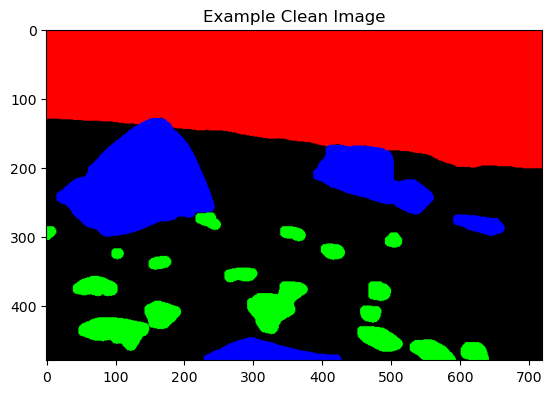

In [6]:
example = plt.imread(os.path.join(DATA_PATH,'images', 'clean','clean0015.png'))
plt.imshow(example)
plt.title("Example Clean Image")

In [7]:
df = pd.read_csv(os.path.join(DATA_PATH, 'images_summary.csv'))
df = df.drop(columns = 'Unnamed: 0')

In [9]:
df

,image,reds,greens,blues,blacks
0,clean5687.png,45185,1178,1035,298202
1,clean0259.png,30097,0,0,315503
2,clean3816.png,54816,9340,5425,276019
3,clean9485.png,121909,0,1107,222584
4,clean1576.png,37348,15660,4957,287635
...,...,...,...,...,...
9761,clean7704.png,97538,5316,8658,234088
9762,clean8991.png,16295,12701,0,316604
9763,clean2060.png,139448,1166,2430,202556
9764,clean8331.png,47971,3925,1773,291931


In [10]:
melted = df.melt(id_vars = ['image'], value_vars = ['reds', 'greens', 'blues', 'blacks'], var_name = 'pixel_cat')

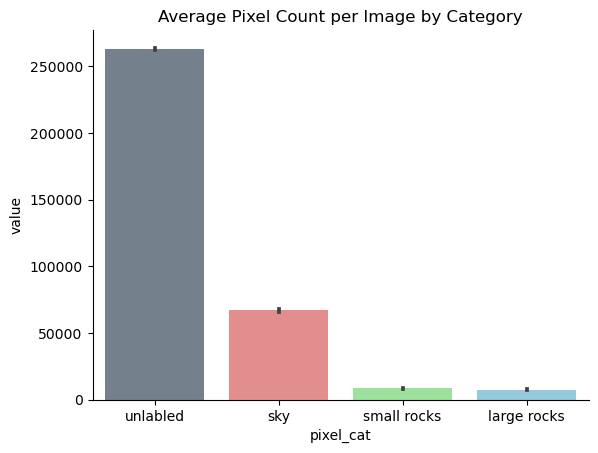

In [11]:
palette = {
    'reds':'light_coral',
    'greens':'lightgreen',
    'blues':'mediumturquoise',
    'blacks':'slategray'
}
melted = melted.replace({'blacks':'unlabled', 'reds':'sky', 'greens':'small rocks', 'blues':'large rocks'})
fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.barplot(data = melted, x = 'pixel_cat', y = 'value', palette = ['slategrey', 'lightcoral', 'lightgreen', 'skyblue'],
            order = melted.groupby('pixel_cat').mean().sort_values(by = 'value', ascending = False).index)
ax.set_title('Average Pixel Count per Image by Category')
sns.despine()

In [12]:
df['sky_perc'] = df.apply(lambda x: x.reds/(x.reds+x.blues+x.greens+x.blacks), axis = 1)
df['largerocks_perc'] = df.apply(lambda x: x.blues/(x.reds+x.blues+x.greens+x.blacks), axis = 1)
df['unlabeled_perc'] = df.apply(lambda x: x.blacks/(x.reds+x.blues+x.greens+x.blacks), axis = 1)
df['smallrocks_perc'] = df.apply(lambda x: x.greens/(x.reds+x.blues+x.greens+x.blacks), axis = 1)

melted_perc = df.melt(id_vars = ['image'], value_vars = ['sky_perc', 'smallrocks_perc', 'largerocks_perc', 'unlabeled_perc'], var_name = 'pixel_cat')

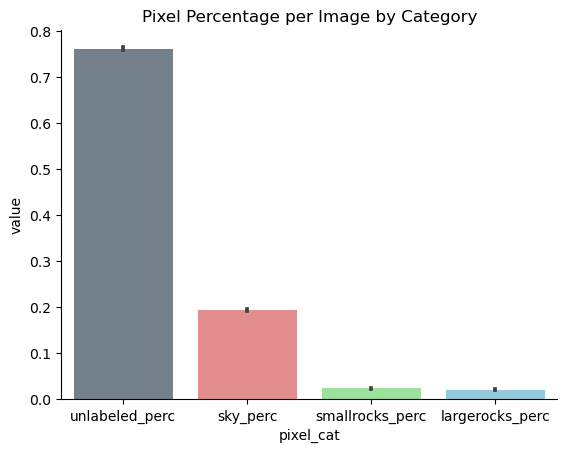

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.barplot(data = melted_perc, x = 'pixel_cat', y = 'value', order = melted_perc.groupby('pixel_cat').mean().sort_values(by = 'value', ascending = False).index,
            palette = ['slategrey', 'lightcoral', 'lightgreen', 'skyblue'])
ax.set_title('Pixel Percentage per Image by Category')
sns.despine()

In [14]:
df['has_sky'] = df.reds > 0
df['has_smallrocks'] = df.greens > 0
df['has_largerocks'] = df.blues > 0
df['has_unlabeled'] = df.blacks > 0
num_images = df.groupby('image').count().shape[0]
num_images
dat = df.sum()[['has_sky', 'has_smallrocks', 'has_largerocks', 'has_unlabeled']]/num_images * 100
dat = dat.sort_values(ascending = False)

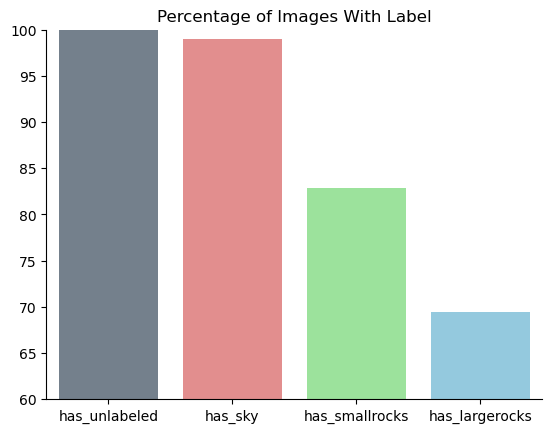

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.barplot(x = dat.index, y = dat.values, palette = ['slategrey', 'lightcoral', 'lightgreen', 'skyblue'])
ax.set_title('Percentage of Images With Label')
ax.set_ylim((60,100))
sns.despine()

In [18]:
red_dat = np.load(os.path.join(DATA_PATH, 'red_dat.npy'))
blue_dat = np.load(os.path.join(DATA_PATH, 'blue_dat.npy'))
green_dat = np.load(os.path.join(DATA_PATH, 'green_dat.npy'))
black_dat = np.load(os.path.join(DATA_PATH, 'black_dat.npy'))

In [27]:
red_hm = pd.DataFrame(red_dat)
blue_hm = pd.DataFrame(blue_dat)
green_hm = pd.DataFrame(green_dat)
black_hm = pd.DataFrame(black_dat)

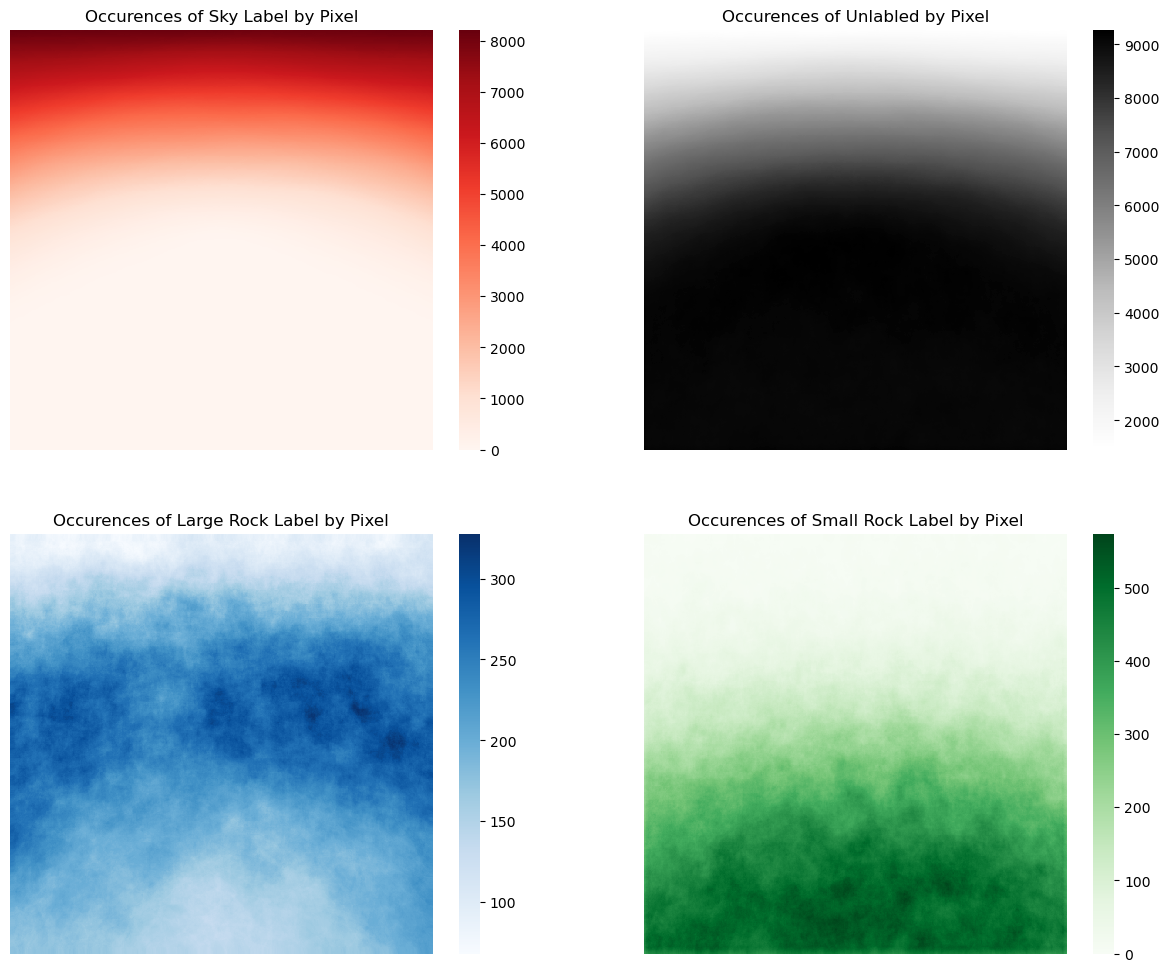

In [37]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,12))
sns.heatmap(red_hm, ax = axes[0,0], cmap = 'Reds')
sns.heatmap(blue_hm, ax = axes[1,0], cmap = 'Blues')
sns.heatmap(green_hm, ax = axes[1,1], cmap = 'Greens')
sns.heatmap(black_hm, ax = axes[0,1], cmap = 'Greys')

axes[0,0].set_title("Occurences of Sky Label by Pixel")
axes[0,1].set_title("Occurences of Unlabled by Pixel")
axes[1,0].set_title("Occurences of Large Rock Label by Pixel")
axes[1,1].set_title("Occurences of Small Rock Label by Pixel")

for ax in axes.flatten():
    t = ax.set_xticks([])
    t = ax.set_yticks([])